<a href="https://colab.research.google.com/github/plaban1981/HACKEREARTH/blob/master/HackerEarth_Machine_Learning_Challenge_Exhibit_Art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement : Predict the cost to ship the sculptures

**Task**

You work for a company that sells sculptures that are acquired from various artists around the world. Your task is to predict the cost required to ship these sculptures to customers based on the information provided in the dataset.

https://www.kaggle.com/imsparsh/hackerearth-ml-exhibit-a-rt-w-ensembles-92

**Data description**

The dataset folder contains the following files:

* train.csv: 6500 x 20
* test.csv: 3500 x 19
* sample_submission.csv: 5 x 2


Column name	Description
* Customer Id	Represents the unique identification number of the customers
* Artist Name	Represents the name of the artist
* Artist Reputation	
Represents the reputation of an artist in the market (the greater the reputation value, the higher the reputation of the artist in the market)
* Height	Represents the height of the sculpture
* Width	Represents the width of the sculpture
* Weight	Represents the weight of the sculpture
* Material	Represents the material that the sculpture is made of
* Price Of Sculpture	Represents the price of the sculpture
* Base Shipping Price	Represents the base price for shipping a sculpture
* International	Represents whether the shipping is international
* Express Shipment	Represents whether the shipping was in the express (fast) mode
* Installation Included	Represents whether the order had installation included in the purchase of the sculpture
* Transport	Represents the mode of transport of the order
* Fragile	Represents whether the order is fragile
* Customer Information	Represents details about a customer
* Remote Location	Represents whether the customer resides in a remote location
* Scheduled Date	Represents the date when the order was placed
* Delivery Date	Represents the date of delivery of the order
* Customer Location	Represents the location of the customer
* Cost	Represents the cost of the order

## Evaluation Metrics

score = 100*max(0, 1-metrics.mean_squared_log_error(actual, predicted))

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/HackerEarth/7342422066d511eb (1).zip" -d "/content/drive/MyDrive/HackerEarth"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/HackerEarth/dataset/train.csv",parse_dates=['Scheduled Date','Delivery Date'])
test_data = pd.read_csv("/content/drive/MyDrive/HackerEarth/dataset/test.csv",parse_dates=['Scheduled Date','Delivery Date'])

In [ ]:
train_data.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23


In [ ]:
train_data.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23


In [ ]:
train_data.tail()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
6495,fffe3800370037003300,Jeffrey Freudenthal,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,2018-03-28,2018-03-25,"New Robert, VT 85335",872.43
6496,fffe310036003400,Larry Edwards,0.67,15.0,NaN,18981.0,NaN,67.18,27.72,No,No,No,Roadways,No,Working Class,No,2015-08-29,2015-08-27,"New Joshua, VA 35766",1347.02
6497,fffe3600300031003300,Denise Worth,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,NaN,Yes,Wealthy,No,2019-04-10,2019-04-09,"Lake Kelly, MA 80823",354.55
6498,fffe3600350035003900,Daniel Drew,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,2019-03-10,2019-03-12,"Hintonberg, UT 35006",5037.50
6499,fffe3700310031003600,Vernon Carroll,0.18,30.0,13.0,34729.0,Brass,46.63,78.25,No,Yes,No,Airways,No,Working Class,No,2016-12-03,2016-12-05,"New Christopher, AK 87406",722.47


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Id            6500 non-null   object        
 1   Artist Name            6500 non-null   object        
 2   Artist Reputation      5750 non-null   float64       
 3   Height                 6125 non-null   float64       
 4   Width                  5916 non-null   float64       
 5   Weight                 5913 non-null   float64       
 6   Material               5736 non-null   object        
 7   Price Of Sculpture     6500 non-null   float64       
 8   Base Shipping Price    6500 non-null   float64       
 9   International          6500 non-null   object        
 10  Express Shipment       6500 non-null   object        
 11  Installation Included  6500 non-null   object        
 12  Transport              5108 non-null   object        
 13  Fra

In [ ]:
train_data.describe(include='all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
count,6500,6500,5750.000000,6125.000000,5916.000000,5.913000e+03,5736,6500.00000,6500.000000,6500,6500,6500,5108,6500,6500,5729,6500,6500,6500,6.500000e+03
unique,6500,6449,NaN,NaN,NaN,NaN,7,NaN,NaN,2,2,2,3,2,2,2,1660,1664,6500,NaN
top,fffe3600390032003200,John Brown,NaN,NaN,NaN,NaN,Brass,NaN,NaN,No,No,No,Roadways,No,Working Class,No,2015-07-16 00:00:00,2016-12-08 00:00:00,"East Christinaview, VA 35327",NaN
freq,1,4,NaN,NaN,NaN,NaN,847,NaN,NaN,4294,4365,3916,2064,5461,4803,4594,12,12,1,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,2015-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-27 00:00:00,2019-08-29 00:00:00,NaN,NaN
mean,NaN,NaN,0.461850,21.766204,9.617647,4.006948e+05,NaN,1192.42009,37.407174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.713920e+04
std,NaN,NaN,0.265781,11.968192,5.417000,2.678081e+06,NaN,8819.61675,26.873519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.406579e+05
min,NaN,NaN,0.000000,3.000000,2.000000,3.000000e+00,NaN,3.00000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.801727e+05
25%,NaN,NaN,0.240000,12.000000,6.000000,5.030000e+02,NaN,5.23000,16.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.884400e+02


In [4]:
test_copy = test_data.copy()
train_data = train_data.drop(['Customer Id', 'Artist Name'] ,axis=1)
test_data=  test_data.drop(['Customer Id', 'Artist Name'] ,axis=1)

In [5]:
# select numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [6]:
cont_features, cat_features = divideFeatures(train_data)
cat_features

,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Customer Location
0,Brass,Yes,Yes,No,Airways,No,Working Class,No,"New Michelle, OH 50777"
1,Brass,No,No,No,Roadways,No,Working Class,No,"New Michaelport, WY 12072"
2,Clay,No,No,No,Roadways,Yes,Working Class,Yes,"Bowmanshire, WA 19241"
3,Aluminium,No,No,No,NaN,No,Wealthy,Yes,"East Robyn, KY 86375"
4,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,"Aprilside, PA 52793"
...,...,...,...,...,...,...,...,...,...
6495,Brass,Yes,Yes,No,Airways,No,Wealthy,Yes,"New Robert, VT 85335"
6496,NaN,No,No,No,Roadways,No,Working Class,No,"New Joshua, VA 35766"
6497,Clay,Yes,No,No,NaN,Yes,Wealthy,No,"Lake Kelly, MA 80823"
6498,Stone,No,Yes,No,Roadways,No,Working Class,Yes,"Hintonberg, UT 35006"


## Visualize correlation through heatmaps

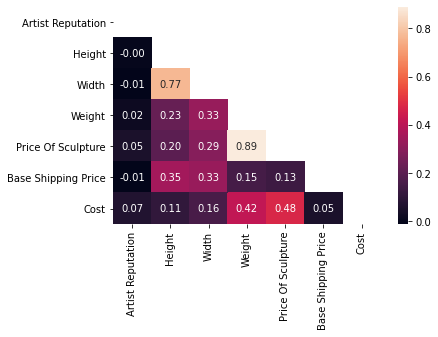

In [7]:
# correlation heatmap for all features
corr = train_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True,fmt=".2f")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


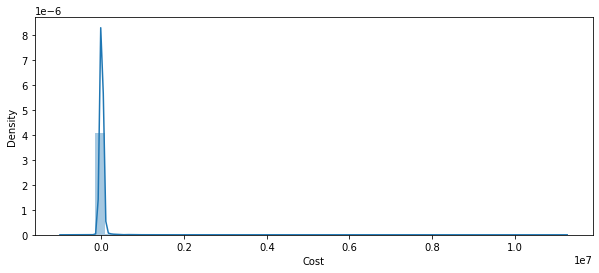

In [ ]:
# plot sample skewed feature
plt.figure(figsize=(10,4))
sns.distplot(train_data['Cost'])
plt.show()

## Skewed Features in descending order

In [ ]:
skewed_features = cont_features.apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features

Cost                   29.817459
Price Of Sculpture     22.206823
Weight                 21.556174
Width                   1.546702
Base Shipping Price     0.918102
Height                  0.594041
Artist Reputation       0.141363
dtype: float64

In [ ]:
train_data.isnull().sum()[train_data.isnull().sum() > 0].to_dict()

{'Artist Reputation': 750,
 'Height': 375,
 'Material': 764,
 'Remote Location': 771,
 'Transport': 1392,
 'Weight': 587,
 'Width': 584}

In [8]:
k = train_data.isnull().sum()[train_data.isnull().sum() > 0].to_dict().keys()
v = train_data.isnull().sum()[train_data.isnull().sum() > 0].to_dict().values()

In [9]:
missing = pd.DataFrame({'Atrribute':k,'Count':v})

In [10]:
missing['Percent'] = missing['Count']/len(train_data)

In [11]:
missing= missing.sort_values(by='Percent',ascending=False)

In [12]:
missing.reset_index(inplace=True)

In [13]:
missing.drop('index',axis=1,inplace=True)

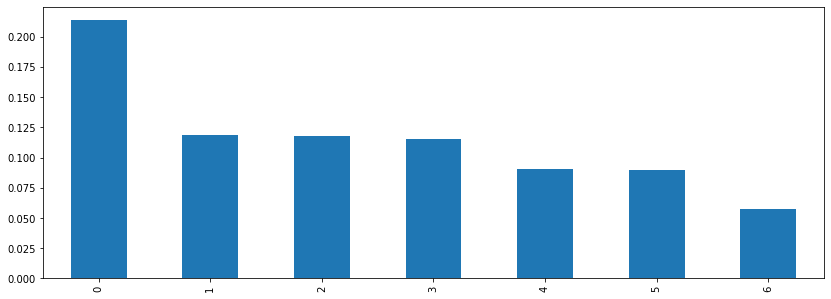

In [14]:
missing['Percent'].plot(kind='bar',figsize=(14,5),)

In [15]:
train_data.shape

(6500, 18)

In [16]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Artist Reputation     750
Height                375
Width                 584
Weight                587
Material              764
Transport            1392
Remote Location       771
dtype: int64

In [17]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Artist Reputation    222
Height               119
Width                141
Weight               149
Transport            232
dtype: int64

In [18]:
def fillNan(df, col, value):
    df[col].fillna(value, inplace=True)

In [19]:
fillNan(train_data, 'Artist Reputation', train_data['Artist Reputation'].median())
fillNan(test_data ,'Artist Reputation', train_data['Artist Reputation'].median())
train_data['Artist Reputation'].isna().any()

False

In [20]:
fillNan(train_data, 'Height', train_data['Height'].median())
fillNan(test_data, 'Height', train_data['Height'].median())
train_data['Height'].isna().any()

False

In [21]:
fillNan(train_data, 'Weight', train_data['Weight'].median())
fillNan(test_data, 'Weight', train_data['Weight'].median())
train_data['Weight'].isna().any()

False

In [22]:
fillNan(train_data, 'Width', train_data['Width'].median())
fillNan(test_data, 'Width', train_data['Width'].median())
train_data['Width'].isna().any()

False

In [23]:
fillNan(train_data, 'Transport', train_data['Transport'].mode()[0])
fillNan(test_data, 'Transport', train_data['Transport'].mode()[0])
train_data['Transport'].isna().any()

False

In [24]:
fillNan(train_data, 'Material', train_data['Material'].mode()[0])
fillNan(test_data, 'Material', train_data['Material'].mode()[0])
train_data['Material'].isna().any()

False

In [25]:
fillNan(train_data, 'Remote Location', train_data['Remote Location'].mode()[0])
fillNan(test_data, 'Remote Location', train_data['Remote Location'].mode()[0])
train_data['Remote Location'].isna().any()

False

In [26]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Series([], dtype: int64)

In [27]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)

## Derived Features

In [28]:
# score addition
train_data['state'] = train_data['Customer Location'].map(lambda x:x.split()[-2])
train_data.drop('Customer Location', inplace=True, axis=1)
test_data['state'] = test_data['Customer Location'].map(lambda x:x.split()[-2])
test_data.drop('Customer Location', inplace=True, axis=1)
test_data.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,state
0,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,2017-07-03,2017-07-06,IA
1,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,2016-05-02,2016-05-02,OH
2,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,2018-01-04,2018-01-06,AP
3,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,2017-09-14,2017-09-17,AL
4,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,2017-12-03,2017-12-02,LA


In [29]:
train_data['dday'] = train_data['Delivery Date'].dt.day
train_data['dmonth'] = train_data['Delivery Date'].dt.month
train_data['dyear'] = train_data['Delivery Date'].dt.year
train_data['ddayofweek'] = train_data['Delivery Date'].dt.dayofweek
#
test_data['dday'] = test_data['Delivery Date'].dt.day
test_data['dmonth'] = test_data['Delivery Date'].dt.month
test_data['dyear'] = test_data['Delivery Date'].dt.year
test_data['ddayofweek'] = test_data['Delivery Date'].dt.dayofweek

In [ ]:
train_data.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,state,dday,dmonth,dyear,ddayofweek
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,-283.29,OH,3,6,2015,2
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,-159.96,WY,5,3,2017,6
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,-154.29,WA,8,3,2015,6
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,2015-05-24,2015-05-20,-161.16,KY,20,5,2015,2
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,-159.23,PA,14,12,2016,2


In [30]:
train_data['scheduleDiff'] = (train_data['Delivery Date'] - train_data['Scheduled Date']).dt.days

In [31]:
test_data['scheduleDiff'] = (test_data['Delivery Date'] - train_data['Scheduled Date']).dt.days

In [32]:
train_data.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,state,dday,dmonth,dyear,ddayofweek,scheduleDiff
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,-283.29,OH,3,6,2015,2,-4
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,-159.96,WY,5,3,2017,6,-1
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,-154.29,WA,8,3,2015,6,-1
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,2015-05-24,2015-05-20,-161.16,KY,20,5,2015,2,-4
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,-159.23,PA,14,12,2016,2,-4


In [33]:
cont_features, cat_features = divideFeatures(train_data)
cat_features

,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,state
0,Brass,Yes,Yes,No,Airways,No,Working Class,No,OH
1,Brass,No,No,No,Roadways,No,Working Class,No,WY
2,Clay,No,No,No,Roadways,Yes,Working Class,Yes,WA
3,Aluminium,No,No,No,Roadways,No,Wealthy,Yes,KY
4,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,PA
...,...,...,...,...,...,...,...,...,...
6495,Brass,Yes,Yes,No,Airways,No,Wealthy,Yes,VT
6496,Brass,No,No,No,Roadways,No,Working Class,No,VA
6497,Clay,Yes,No,No,Roadways,Yes,Wealthy,No,MA
6498,Stone,No,Yes,No,Roadways,No,Working Class,Yes,UT


In [34]:
cat_features.columns

Index(['Material', 'International', 'Express Shipment',
       'Installation Included', 'Transport', 'Fragile', 'Customer Information',
       'Remote Location', 'state'],
      dtype='object')

In [35]:
feat = train_data['Material'].unique()
print(feat)
feat_idx = [x for x in range(len(feat))]
print(feat_idx)

['Brass' 'Clay' 'Aluminium' 'Wood' 'Marble' 'Bronze' 'Stone']
[0, 1, 2, 3, 4, 5, 6]


In [36]:
feat = train_data['Customer Information'].unique()
print(feat)
feat_idx = [x for x in range(len(feat))]
print(feat_idx)

['Working Class' 'Wealthy']
[0, 1]


In [37]:
# label encoding
def mapFeature(data, f, data_test=None):
    feat = data[f].unique()
    feat_idx = [x for x in range(len(feat))]

    data[f].replace(feat, feat_idx, inplace=True)
    if data_test is not None:
        data_test[f].replace(feat, feat_idx, inplace=True)

In [38]:
for col in cat_features.columns:
    mapFeature(train_data, col, test_data)


In [39]:
train_data.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,state,dday,dmonth,dyear,ddayofweek,scheduleDiff
0,0.26,17.0,6.0,4128.0,0,13.91,16.27,0,0,0,0,0,0,0,2015-06-07,2015-06-03,-283.29,0,3,6,2015,2,-4
1,0.28,3.0,3.0,61.0,0,6.83,15.00,1,1,0,1,0,0,0,2017-03-06,2017-03-05,-159.96,1,5,3,2017,6,-1
2,0.07,8.0,5.0,237.0,1,4.96,21.18,1,1,0,1,1,0,1,2015-03-09,2015-03-08,-154.29,2,8,3,2015,6,-1
3,0.12,9.0,8.0,3102.0,2,5.81,16.31,1,1,0,1,0,1,1,2015-05-24,2015-05-20,-161.16,3,20,5,2015,2,-4
4,0.15,17.0,6.0,324.0,2,3.18,11.94,0,0,1,0,0,0,0,2016-12-18,2016-12-14,-159.23,4,14,12,2016,2,-4


In [40]:
test_data.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,state,dday,dmonth,dyear,ddayofweek,scheduleDiff
0,0.35,53.0,18.0,871.0,3,5.98,19.11,0,0,0,0,0,0,0,2017-07-03,2017-07-06,20,6,7,2017,3,760.0
1,0.67,7.0,4.0,108.0,1,6.92,13.96,1,1,0,1,1,0,0,2016-05-02,2016-05-02,0,2,5,2016,0,-308.0
2,0.61,6.0,5.0,97.0,2,4.23,13.62,0,1,0,0,0,0,0,2018-01-04,2018-01-06,18,6,1,2018,5,1034.0
3,0.14,15.0,8.0,757.0,1,6.28,23.79,1,0,0,1,1,1,0,2017-09-14,2017-09-17,5,17,9,2017,6,847.0
4,0.63,10.0,4.0,1673.0,4,4.39,17.83,1,0,1,1,0,0,1,2017-12-03,2017-12-02,28,2,12,2017,5,349.0


In [41]:
train_data.drop(['Scheduled Date','Delivery Date'],axis=1,inplace=True)
test_data.drop(['Scheduled Date','Delivery Date'],axis=1,inplace=True)

## Dealing with negative cost values

In [86]:
def log1p(vec):
    return np.log1p(abs(vec))

def expm1(x):
    return np.expm1(x)

def clipExp(vec):
    return np.clip(expm1(vec), 0, None)

def getRmse(y_train, y_train_pred):
    return mean_squared_error(y_train, y_train_pred)

In [44]:
# apply log on target feature with abs as it has many negative values
train_data['Cost']= log1p(train_data['Cost'])
train_data['Cost'].min()

4.466712392840524

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


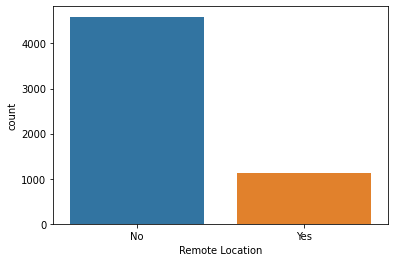

In [ ]:
sns.countplot(train_data['Remote Location'])

In [ ]:
train_data['Remote Location'].value_counts(dropna=False)

No     4594
Yes    1135
NaN     771
Name: Remote Location, dtype: int64

In [45]:
train_data.isnull().sum()

Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Cost                     0
state                    0
dday                     0
dmonth                   0
dyear                    0
ddayofweek               0
scheduleDiff             0
dtype: int64

In [46]:
!pip install catboost

     |████████████████████████████████| 65.8MB 78kB/s 


In [47]:
from catboost import CatBoostRegressor
from sklearn.metrics import *
from sklearn.model_selection import *

In [48]:
train_data['Cost'].describe()

count    6500.000000
mean        6.595800
std         1.650965
min         4.466712
25%         5.428446
50%         6.129388
75%         7.220572
max        16.226361
Name: Cost, dtype: float64

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist Reputation      6500 non-null   float64
 1   Height                 6500 non-null   float64
 2   Width                  6500 non-null   float64
 3   Weight                 6500 non-null   float64
 4   Material               6500 non-null   int64  
 5   Price Of Sculpture     6500 non-null   float64
 6   Base Shipping Price    6500 non-null   float64
 7   International          6500 non-null   int64  
 8   Express Shipment       6500 non-null   int64  
 9   Installation Included  6500 non-null   int64  
 10  Transport              6500 non-null   int64  
 11  Fragile                6500 non-null   int64  
 12  Customer Information   6500 non-null   int64  
 13  Remote Location        6500 non-null   int64  
 14  Cost                   6500 non-null   float64
 15  stat

In [50]:
X = train_data.drop('Cost',axis=1)
Y = train_data['Cost']
#Y = normalized

In [51]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'learning_rate': [0.0007,0.005, 0.001,0.01],
    'n_estimators': [1000,2000,300,5000],
    'random_state' : [42,500,720]
    }
catboost = CatBoostRegressor()
grid = GridSearchCV(catboost, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 15.8min finished


Streaming output truncated to the last 5000 lines.
2:	learn: 1.6111781	total: 51.8ms	remaining: 1m 26s
3:	learn: 1.5978352	total: 53.5ms	remaining: 1m 6s
4:	learn: 1.5849147	total: 55.1ms	remaining: 55.1s
5:	learn: 1.5720831	total: 56.8ms	remaining: 47.3s
6:	learn: 1.5597522	total: 58.5ms	remaining: 41.7s
7:	learn: 1.5472624	total: 60.2ms	remaining: 37.5s
8:	learn: 1.5352511	total: 61.9ms	remaining: 34.3s
9:	learn: 1.5233808	total: 63.5ms	remaining: 31.7s
10:	learn: 1.5109980	total: 65.3ms	remaining: 29.6s
11:	learn: 1.4988362	total: 67ms	remaining: 27.9s
12:	learn: 1.4872438	total: 68.8ms	remaining: 26.4s
13:	learn: 1.4751127	total: 70.7ms	remaining: 25.2s
14:	learn: 1.4639695	total: 72.4ms	remaining: 24.1s
15:	learn: 1.4521968	total: 74.3ms	remaining: 23.1s
16:	learn: 1.4402934	total: 75.9ms	remaining: 22.3s
17:	learn: 1.4287325	total: 77.7ms	remaining: 21.5s
18:	learn: 1.4174802	total: 79.3ms	remaining: 20.8s
19:	learn: 1.4064138	total: 81ms	remaining: 20.2s
20:	learn: 1.3957417	tot

Streaming output truncated to the last 5000 lines.
4:	learn: 1.6362995	total: 7.36ms	remaining: 7.36s
5:	learn: 1.6236742	total: 8.7ms	remaining: 7.24s
6:	learn: 1.6115538	total: 10.1ms	remaining: 7.21s
7:	learn: 1.5988750	total: 11.5ms	remaining: 7.16s
8:	learn: 1.5870433	total: 13ms	remaining: 7.2s
9:	learn: 1.5750185	total: 14.4ms	remaining: 7.18s
10:	learn: 1.5626448	total: 15.7ms	remaining: 7.14s
11:	learn: 1.5511262	total: 17.1ms	remaining: 7.11s
12:	learn: 1.5393481	total: 18.5ms	remaining: 7.08s
13:	learn: 1.5274290	total: 19.8ms	remaining: 7.04s
14:	learn: 1.5167192	total: 21.1ms	remaining: 7.03s
15:	learn: 1.5049301	total: 22.5ms	remaining: 7s
16:	learn: 1.4929698	total: 23.8ms	remaining: 6.97s
17:	learn: 1.4814870	total: 25.1ms	remaining: 6.94s
18:	learn: 1.4700729	total: 26.5ms	remaining: 6.95s
19:	learn: 1.4585700	total: 27.8ms	remaining: 6.93s
20:	learn: 1.4479558	total: 29.1ms	remaining: 6.91s
21:	learn: 1.4369710	total: 30.5ms	remaining: 6.91s
22:	learn: 1.4258368	total

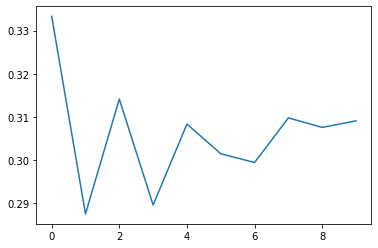

In [52]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.model_selection import KFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = KFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = CatBoostRegressor(learning_rate =0.01, n_estimators =5000, random_state = 42)    

        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(np.sqrt(mean_squared_error(ytest,preds)))
        scores.append(np.sqrt(mean_squared_error(ytest,preds)))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [ ]:
def rmsle(y, y0):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.model_selection import KFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = KFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = CatBoostRegressor(learning_rate =0.0007, n_estimators =5000, random_state = 42)    

        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(rmsle(ytest, preds))
        scores.append(rmsle(ytest, preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

Running 1 iteration


CatBoostError: ignored

In [53]:
predictions = grid.best_estimator_.predict(test_data)

In [54]:
predictions.min()

4.50385313427371

In [56]:
test_pred = clipExp(predictions)

In [57]:
test_pred

array([   240.94819982,    296.27102268,    173.17188351, ...,
          733.93355456,    224.43305449, 117057.24769887])

In [58]:
test_pred.min()

89.36464847957835

In [59]:
df = pd.DataFrame()
df['Customer Id'] = test_copy['Customer Id']
df['Cost'] = test_pred


In [60]:
df.head()

,Customer Id,Cost
0,fffe3400310033003300,240.948200
1,fffe3600350035003400,296.271023
2,fffe3700360030003500,173.171884
3,fffe350038003600,186.393984
4,fffe3500390032003500,284.004498


In [61]:
df.to_csv("catboost.csv",index=False)

#### **Submission scores Catboost Regressor : 92.89352**

In [68]:
train_data.to_csv("training.csv",index=False)
test_data.to_csv("testing.csv",index=False)

## Implement Stacking Regressor using MLXTEND

In [70]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

RANDOM_SEED = 42

In [67]:
ridge = RidgeCV(scoring = "neg_mean_squared_error", 
                           alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0, 10], 
                           cv=5)
ridge

RidgeCV(alphas=array([1.e-04, 5.e-04, 1.e-03, 5.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
ridge.fit(X_train, y_train)
# predict
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(f"Training Accuracy : {getRmse(y_train, y_train_pred)}")
print(f"Validation Accuracy : {getRmse(y_test, y_test_pred)}")

Training Accuracy : 0.856644424784104
Validation Accuracy : 0.7585910042182956


In [72]:
enet = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                    alphas = [1, 0.1, 0.01, 0.001, 0.0005], cv=5)
enet

ElasticNetCV(alphas=[1, 0.1, 0.01, 0.001, 0.0005], copy_X=True, cv=5, eps=0.001,
             fit_intercept=True, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [88]:
enet.fit(X_train, y_train)
# predict
y_train_pred = enet.predict(X_train)
y_test_pred = enet.predict(X_test)
print(f"Training Accuracy : {getRmse(y_train, y_train_pred)}")
print(f"Validation Accuracy : {getRmse(y_test, y_test_pred)}")

Training Accuracy : 0.8566607998353939
Validation Accuracy : 0.7588780640733875


In [73]:
rf = RandomForestRegressor()
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [74]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'max_depth': [2,4,8,16],
    'n_estimators': [100,200,300,500],
    'random_state' : [42,500,720]
    }
rf= RandomForestRegressor()
grid = GridSearchCV(rf, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.8min finished


{'max_depth': 16, 'n_estimators': 500, 'random_state': 720}
0.9589879780018222


In [78]:
rf = grid.best_estimator_
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=720, verbose=0, warm_start=False)

In [90]:
rf.fit(X_train, y_train)
# predict
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(f"Training Accuracy : {getRmse(y_train, y_train_pred)}")
print(f"Validation Accuracy : {getRmse(y_test, y_test_pred)}")

Training Accuracy : 0.015437464836697397
Validation Accuracy : 0.12700351281392167


In [79]:
cat = CatBoostRegressor(learning_rate =0.01, n_estimators =5000, random_state = 42)
cat

In [91]:
cat.fit(X_train, y_train)
# predict
y_train_pred = cat.predict(X_train)
y_test_pred = cat.predict(X_test)
print(f"Training Accuracy : {getRmse(y_train, y_train_pred)}")
print(f"Validation Accuracy : {getRmse(y_test, y_test_pred)}")

Streaming output truncated to the last 5000 lines.
2:	learn: 1.6111272	total: 5.54ms	remaining: 9.23s
3:	learn: 1.5980308	total: 7.05ms	remaining: 8.8s
4:	learn: 1.5853224	total: 8.68ms	remaining: 8.67s
5:	learn: 1.5724100	total: 10.2ms	remaining: 8.5s
6:	learn: 1.5596134	total: 11.8ms	remaining: 8.42s
7:	learn: 1.5471246	total: 13.3ms	remaining: 8.29s
8:	learn: 1.5353366	total: 14.9ms	remaining: 8.24s
9:	learn: 1.5237913	total: 16.4ms	remaining: 8.2s
10:	learn: 1.5114299	total: 18ms	remaining: 8.17s
11:	learn: 1.5001544	total: 19.6ms	remaining: 8.13s
12:	learn: 1.4885673	total: 21.2ms	remaining: 8.12s
13:	learn: 1.4767731	total: 22.7ms	remaining: 8.08s
14:	learn: 1.4657225	total: 24.3ms	remaining: 8.07s
15:	learn: 1.4543290	total: 25.8ms	remaining: 8.04s
16:	learn: 1.4424030	total: 27.4ms	remaining: 8.04s
17:	learn: 1.4309215	total: 29ms	remaining: 8.02s
18:	learn: 1.4195854	total: 30.5ms	remaining: 7.99s
19:	learn: 1.4085267	total: 32ms	remaining: 7.97s
20:	learn: 1.3977297	total: 33

In [105]:
gridParams = {
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1.0, 10]
    }
lasso =Lasso()
grid = GridSearchCV(lasso, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'alpha': 0.0001}
0.6462848426859733


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.2s finished


In [106]:
lasso = grid.best_estimator_
lasso

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [107]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()
lgb

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [110]:
gridParams = {
    'learning_rate': [0.0007,0.005, 0.001,0.01],
    'n_estimators': [100,300,1000,2000,5000],
    'max_depth': [2,4,6,8],
    'random_state' : [42,500,720]
    }
lgb = LGBMRegressor()
grid = GridSearchCV(lgb, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 385 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1033 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 14.7min finished


{'learning_rate': 0.005, 'max_depth': 8, 'n_estimators': 5000, 'random_state': 42}
0.9670520358885156


## Tuned LGBMRegressor

In [112]:
lgb = grid.best_estimator_
lgb

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.005, max_depth=8,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=5000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [135]:
from xgboost import XGBRFRegressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgbrf = XGBRFRegressor()

In [136]:
xgb 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## Tuned XGBoost Regressor

In [137]:
gridParams = {
    'learning_rate': [0.0007,0.005, 0.001,0.01],
    'n_estimators': [100,300,1000,2000,5000],
    'max_depth': [2,4,6,8],
    'random_state' : [42,500,720]
    }
xgb = XGBRegressor()
grid = GridSearchCV(xgb, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 57.4min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 75.1min finished


[09:36:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 5000, 'random_state': 42}
0.9716183289063451


In [138]:
xgb = grid.best_estimator_
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=5000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## Tuned XGB RandomForest Regressor

In [139]:
xgbrf

XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [140]:
gridParams = {
    'learning_rate': [0.0007,0.005, 0.001,0.01],
    'n_estimators': [100,300,1000,2000,5000],
    'max_depth': [3,4,6,8],
    'random_state' : [42,500,720]
    }
xgbrf = XGBRFRegressor()
grid = GridSearchCV(xgbrf, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 46.1min finished


[10:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'random_state': 42}
-13.377320490173542


In [141]:
xgbrf = grid.best_estimator_

In [142]:
xgbrf

XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=0.01,
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
               n_estimators=300, n_jobs=1, nthread=None, objective='reg:linear',
               random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
               seed=None, silent=None, subsample=0.8, verbosity=1)

In [143]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
lr.fit(X_train, y_train)
# predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(f"Training Accuracy : {getRmse(y_train, y_train_pred)}")
print(f"Validation Accuracy : {getRmse(y_test, y_test_pred)}")

Training Accuracy : 0.8566444247840768
Validation Accuracy : 0.7585909933946096


In [116]:
# define the base models
level0 = list()
level0.append(('lasso', lasso))
level0.append(('ridge', ridge))
level0.append(('rf', rf))
# define meta learner model
level1 = lgb

In [145]:
from sklearn.ensemble import StackingClassifier
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import cross_val_score
stack = StackingCVRegressor(regressors=(rf,lgb,xgb),
                            meta_regressor=cat)

In [128]:
X.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,state,dday,dmonth,dyear,ddayofweek,scheduleDiff
0,0.26,17.0,6.0,4128.0,0,13.91,16.27,0,0,0,0,0,0,0,0,3,6,2015,2,-4
1,0.28,3.0,3.0,61.0,0,6.83,15.00,1,1,0,1,0,0,0,1,5,3,2017,6,-1
2,0.07,8.0,5.0,237.0,1,4.96,21.18,1,1,0,1,1,0,1,2,8,3,2015,6,-1
3,0.12,9.0,8.0,3102.0,2,5.81,16.31,1,1,0,1,0,1,1,3,20,5,2015,2,-4
4,0.15,17.0,6.0,324.0,2,3.18,11.94,0,0,1,0,0,0,0,4,14,12,2016,2,-4


In [146]:
stack.fit(X_train.values,y_train.values)

Streaming output truncated to the last 5000 lines.
1:	learn: 1.6215979	total: 3.56ms	remaining: 8.9s
2:	learn: 1.6071560	total: 4.93ms	remaining: 8.21s
3:	learn: 1.5927362	total: 6.33ms	remaining: 7.9s
4:	learn: 1.5783422	total: 7.69ms	remaining: 7.69s
5:	learn: 1.5642728	total: 9.02ms	remaining: 7.51s
6:	learn: 1.5499703	total: 10.4ms	remaining: 7.41s
7:	learn: 1.5361874	total: 11.7ms	remaining: 7.31s
8:	learn: 1.5225871	total: 13ms	remaining: 7.21s
9:	learn: 1.5088086	total: 14.3ms	remaining: 7.14s
10:	learn: 1.4954211	total: 15.6ms	remaining: 7.08s
11:	learn: 1.4819972	total: 16.9ms	remaining: 7.04s
12:	learn: 1.4685702	total: 18.2ms	remaining: 6.99s
13:	learn: 1.4551732	total: 19.5ms	remaining: 6.96s
14:	learn: 1.4421071	total: 20.9ms	remaining: 6.94s
15:	learn: 1.4293188	total: 22.2ms	remaining: 6.91s
16:	learn: 1.4167154	total: 23.6ms	remaining: 6.91s
17:	learn: 1.4043125	total: 24.9ms	remaining: 6.88s
18:	learn: 1.3917534	total: 26.2ms	remaining: 6.87s
19:	learn: 1.3793233	total

StackingCVRegressor(cv=5,
                    meta_regressor=<catboost.core.CatBoostRegressor object at 0x7fa65a24c898>,
                    refit=True,
                    regressors=(RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=16,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                      

In [147]:
# predict
y_train_pred = stack.predict(X_train.values)
y_test_pred = stack.predict(X_test.values)
print(f"Training Accuracy : {getRmse(y_train, y_train_pred)}")
print(f"Validation Accuracy : {getRmse(y_test, y_test_pred)}")

Training Accuracy : 0.024421534750733217
Validation Accuracy : 0.09194124253163208


In [150]:
X.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,state,dday,dmonth,dyear,ddayofweek,scheduleDiff
0,0.26,17.0,6.0,4128.0,0,13.91,16.27,0,0,0,0,0,0,0,0,3,6,2015,2,-4
1,0.28,3.0,3.0,61.0,0,6.83,15.00,1,1,0,1,0,0,0,1,5,3,2017,6,-1
2,0.07,8.0,5.0,237.0,1,4.96,21.18,1,1,0,1,1,0,1,2,8,3,2015,6,-1
3,0.12,9.0,8.0,3102.0,2,5.81,16.31,1,1,0,1,0,1,1,3,20,5,2015,2,-4
4,0.15,17.0,6.0,324.0,2,3.18,11.94,0,0,1,0,0,0,0,4,14,12,2016,2,-4


In [149]:
test_data.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,state,dday,dmonth,dyear,ddayofweek,scheduleDiff
0,0.35,53.0,18.0,871.0,3,5.98,19.11,0,0,0,0,0,0,0,20,6,7,2017,3,760.0
1,0.67,7.0,4.0,108.0,1,6.92,13.96,1,1,0,1,1,0,0,0,2,5,2016,0,-308.0
2,0.61,6.0,5.0,97.0,2,4.23,13.62,0,1,0,0,0,0,0,18,6,1,2018,5,1034.0
3,0.14,15.0,8.0,757.0,1,6.28,23.79,1,0,0,1,1,1,0,5,17,9,2017,6,847.0
4,0.63,10.0,4.0,1673.0,4,4.39,17.83,1,0,1,1,0,0,1,28,2,12,2017,5,349.0


In [152]:
predictions = xgb.predict(test_data)
test_pred = clipExp(predictions)

#### **xgbregressor submission scores :93.13613**

In [157]:
predictions = stack.predict(test_data.values)
test_pred = clipExp(predictions)

In [158]:
test_pred.min()

99.08070048075169

In [159]:
df = pd.DataFrame()
df['Customer Id'] = test_copy['Customer Id']
df['Cost'] = test_pred
df

,Customer Id,Cost
0,fffe3400310033003300,263.354943
1,fffe3600350035003400,288.375444
2,fffe3700360030003500,200.838955
3,fffe350038003600,191.936652
4,fffe3500390032003500,274.746593
...,...,...
3495,fffe3200300037003100,1021.376142
3496,fffe390031003100,2835.105049
3497,fffe3200350031003700,566.997569
3498,fffe3100380031003000,216.802326


In [160]:
df.to_csv("stacking_rf_xgb_cat.csv",index=False)

* **This combination of stacking regressor regressors=(ridge,lasso, rf,lgb),                     meta_regressor=catgave a score 58.09855**

* **This combination of stacking regressor regressors=(rf,lgb,xgb),                     meta_regressor=cat gave a score 92.04038**